In [1]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd

api = 
secret = 

client = Client(api, secret)

In [8]:
from datetime import datetime, timedelta
gmt_time_delta = (datetime.utcnow() - timedelta(minutes=50)).strftime("%d %b %Y %H:%M:%S")
gmt_time_now = datetime.utcnow().strftime("%d %b %Y %H:%M:%S")
gmt_time_delta, gmt_time_now

('09 May 2023 21:14:48', '09 May 2023 22:04:48')

In [9]:
klines_futures = client.futures_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1MINUTE, gmt_time_delta, gmt_time_now)
klines_futures

[[1683666900000,
  '27600.50',
  '27604.90',
  '27591.50',
  '27591.50',
  '173.020',
  1683666959999,
  '4774866.11870',
  2312,
  '29.536',
  '815121.67840',
  '0'],
 [1683666960000,
  '27591.60',
  '27593.60',
  '27591.00',
  '27591.80',
  '101.435',
  1683667019999,
  '2798802.26660',
  1490,
  '45.933',
  '1267374.76670',
  '0'],
 [1683667020000,
  '27591.70',
  '27591.80',
  '27585.40',
  '27585.90',
  '119.296',
  1683667079999,
  '3291154.28910',
  1865,
  '45.633',
  '1258910.96490',
  '0'],
 [1683667080000,
  '27585.90',
  '27595.50',
  '27585.90',
  '27595.50',
  '67.732',
  1683667139999,
  '1868739.46870',
  1132,
  '59.206',
  '1633497.53430',
  '0'],
 [1683667140000,
  '27595.50',
  '27595.50',
  '27592.90',
  '27592.90',
  '52.333',
  1683667199999,
  '1444115.41020',
  738,
  '16.750',
  '462210.29250',
  '0'],
 [1683667200000,
  '27592.90',
  '27605.00',
  '27592.90',
  '27603.10',
  '139.877',
  1683667259999,
  '3860538.31880',
  1518,
  '112.677',
  '3109811.31570'

In [10]:
df = pd.DataFrame(klines_futures, columns=['time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

df['time'] = pd.to_datetime(df['time'], unit='ms')
df.set_index('time', inplace=True)

df = df.tz_localize('UTC').tz_convert('Etc/GMT-3')
df.index = (df.index).strftime('%Y-%m-%d %H:%M:%S')


df = df.astype(float)

df.index = pd.to_datetime(df.index)

df

,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
time,,,,,,,,,,,
2023-05-10 00:15:00,27600.5,27604.9,27591.5,27591.5,173.020,1.683667e+12,4.774866e+06,2312.0,29.536,8.151217e+05,0.0
2023-05-10 00:16:00,27591.6,27593.6,27591.0,27591.8,101.435,1.683667e+12,2.798802e+06,1490.0,45.933,1.267375e+06,0.0
2023-05-10 00:17:00,27591.7,27591.8,27585.4,27585.9,119.296,1.683667e+12,3.291154e+06,1865.0,45.633,1.258911e+06,0.0
2023-05-10 00:18:00,27585.9,27595.5,27585.9,27595.5,67.732,1.683667e+12,1.868739e+06,1132.0,59.206,1.633498e+06,0.0
2023-05-10 00:19:00,27595.5,27595.5,27592.9,27592.9,52.333,1.683667e+12,1.444115e+06,738.0,16.750,4.622103e+05,0.0
2023-05-10 00:20:00,27592.9,27605.0,27592.9,27603.1,139.877,1.683667e+12,3.860538e+06,1518.0,112.677,3.109811e+06,0.0
2023-05-10 00:21:00,27603.2,27603.2,27598.5,27598.6,43.288,1.683667e+12,1.194777e+06,870.0,22.995,6.346650e+05,0.0
2023-05-10 00:22:00,27598.6,27602.1,27598.5,27602.0,28.052,1.683667e+12,7.742466e+05,620.0,20.198,5.574673e+05,0.0
2023-05-10 00:23:00,27602.1,27605.0,27602.0,27603.2,72.592,1.683667e+12,2.003823e+06,998.0,37.442,1.033534e+06,0.0


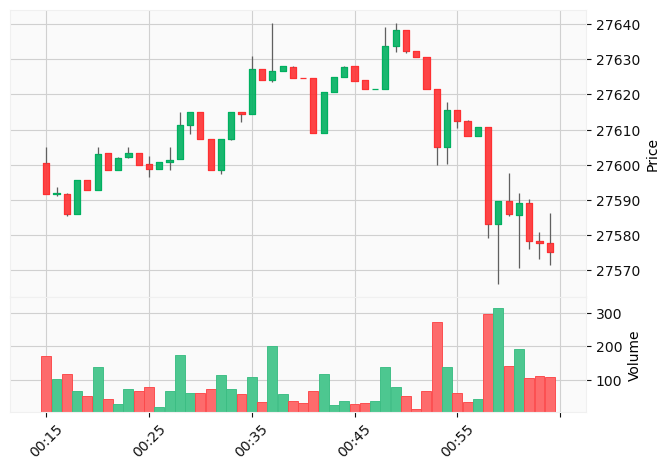

In [11]:
import mplfinance as mpf

mpf.plot(df, type='candle', volume=True, style='yahoo')

<Axes: xlabel='time'>

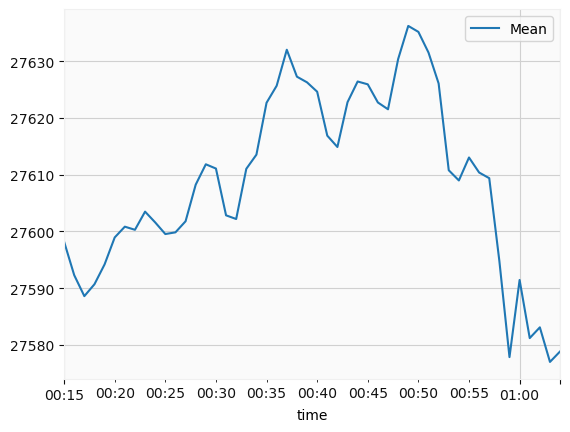

In [16]:
fu_df = df.iloc[:, :5].copy()
fu_df.rename(columns={fu_df.columns[0]: 'Open', fu_df.columns[1]: 'High', fu_df.columns[2]: 'Low', fu_df.columns[3]: 'Close', fu_df.columns[4]: 'Volume'}, inplace=True)
fu_df['Mean'] = fu_df[['High', 'Low']].mean(axis=1)
df2mean = pd.DataFrame()
df2mean.index = fu_df.index
df2mean['Mean'] = fu_df[['High', 'Low']].mean(axis=1)
df2mean.plot()

In [40]:
fu_mean_df = fu_df['Mean'].values
fu_mean_df = fu_mean_df.reshape(-1, 1)
fu_mean_df.shape, fu_mean_df

((50, 1),
 array([[27598.2 ],
        [27592.3 ],
        [27588.6 ],
        [27590.7 ],
        [27594.2 ],
        [27598.95],
        [27600.85],
        [27600.3 ],
        [27603.5 ],
        [27601.6 ],
        [27599.55],
        [27599.85],
        [27601.8 ],
        [27608.25],
        [27611.85],
        [27611.1 ],
        [27602.85],
        [27602.2 ],
        [27611.05],
        [27613.55],
        [27622.7 ],
        [27625.7 ],
        [27632.05],
        [27627.3 ],
        [27626.3 ],
        [27624.65],
        [27616.9 ],
        [27614.9 ],
        [27622.8 ],
        [27626.45],
        [27625.95],
        [27622.75],
        [27621.55],
        [27630.4 ],
        [27636.25],
        [27635.2 ],
        [27631.55],
        [27626.1 ],
        [27610.8 ],
        [27609.  ],
        [27613.05],
        [27610.4 ],
        [27609.4 ],
        [27594.8 ],
        [27577.85],
        [27591.45],
        [27581.2 ],
        [27583.1 ],
        [27577.  ],
        [2

In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

# Fit the scaler on the data
scaler.fit(fu_mean_df)

fu_mean_df = scaler.transform(fu_mean_df)
fu_mean_df.shape, fu_mean_df



((50, 1),
 array([[0.35780591],
        [0.25822785],
        [0.19578059],
        [0.23122363],
        [0.29029536],
        [0.37046414],
        [0.40253165],
        [0.39324895],
        [0.44725738],
        [0.41518987],
        [0.38059072],
        [0.38565401],
        [0.4185654 ],
        [0.52742616],
        [0.58818565],
        [0.57552743],
        [0.43628692],
        [0.42531646],
        [0.57468354],
        [0.61687764],
        [0.77130802],
        [0.82194093],
        [0.92911392],
        [0.84894515],
        [0.83206751],
        [0.80421941],
        [0.67341772],
        [0.63966245],
        [0.77299578],
        [0.83459916],
        [0.82616034],
        [0.7721519 ],
        [0.75189873],
        [0.90126582],
        [1.        ],
        [0.98227848],
        [0.92067511],
        [0.82869198],
        [0.57046414],
        [0.54008439],
        [0.60843882],
        [0.56371308],
        [0.54683544],
        [0.30042194],
        [0.01434599],


In [42]:
import numpy as np
fu_mean_df = np.expand_dims(fu_mean_df, axis=0)
fu_mean_df

array([[[0.35780591],
        [0.25822785],
        [0.19578059],
        [0.23122363],
        [0.29029536],
        [0.37046414],
        [0.40253165],
        [0.39324895],
        [0.44725738],
        [0.41518987],
        [0.38059072],
        [0.38565401],
        [0.4185654 ],
        [0.52742616],
        [0.58818565],
        [0.57552743],
        [0.43628692],
        [0.42531646],
        [0.57468354],
        [0.61687764],
        [0.77130802],
        [0.82194093],
        [0.92911392],
        [0.84894515],
        [0.83206751],
        [0.80421941],
        [0.67341772],
        [0.63966245],
        [0.77299578],
        [0.83459916],
        [0.82616034],
        [0.7721519 ],
        [0.75189873],
        [0.90126582],
        [1.        ],
        [0.98227848],
        [0.92067511],
        [0.82869198],
        [0.57046414],
        [0.54008439],
        [0.60843882],
        [0.56371308],
        [0.54683544],
        [0.30042194],
        [0.01434599],
        [0

In [43]:
import tensorflow as tf
model = tf.keras.models.load_model('stock_prediction.h5')

prediction = model.predict(fu_mean_df)
prediction = scaler.inverse_transform(prediction)
prediction 